In [ ]:
import pandas as pd
from tabulate import tabulate

def transform_service_availability(df, service_columns):
    """Transforms service availability scores (100, 50, 0) into categorical labels."""
    mapping = {100: 'Fully Available', 50: 'Partially Available', 0: 'Unavailable'}
    for col in service_columns:
        if col in df.columns:
            df[col] = df[col].replace(mapping)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df

def summarize_service_availability(df, service_columns):
    """Summarizes service availability counts and percentages."""

    overall_summary = {}
    level_summary = {}

    for service in service_columns:
        if service not in df.columns:
            print(f"Warning: Column '{service}' not found in DataFrame.")
            continue  # Skip to the next service

        overall_counts = df[service].value_counts().to_dict()
        overall_summary[service] = overall_counts

        for level in df['Hospital level'].unique():
            level_df = df[df['Hospital level'] == level]
            level_counts = level_df[service].value_counts().to_dict()

            if level not in level_summary:
                level_summary[level] = {}
            level_summary[level][service] = level_counts

    return overall_summary, level_summary


def format_summary_table(summary_data):
    """Formats summary data with counts and percentages."""

    formatted_table = {}
    for service, counts in summary_data.items():
        total = sum(counts.values()) if counts else 0  # Handle cases where counts might be empty
        formatted_row = {}
        for availability, count in counts.items():
            percentage = (count / total) * 100 if total > 0 else 0
            formatted_row[availability] = f"({count} - {percentage:.1f}%)"
        formatted_table[service] = formatted_row

    return pd.DataFrame.from_dict(formatted_table, orient='index').fillna("(0 - 0.0%)") # Fill missing with 0


def display_tables(overall_formatted, level_formatted):
    """Displays tables using tabulate."""
    print("\nOverall Service Availability Summary:")
    print(tabulate(overall_formatted, headers='keys', tablefmt='pretty'))

    print("\nService Availability Summary by Hospital Level:")
    for level, df in level_formatted.items():
        print(f"\nHospital Level: {level}")
        print(tabulate(df, headers='keys', tablefmt='pretty'))


def export_to_excel(overall_formatted, level_formatted):
    """Exports to Excel, sanitizing sheet names."""
    with pd.ExcelWriter('service_availability_summary.xlsx') as writer:
        overall_formatted.to_excel(writer, sheet_name='Overall Summary')

        for level, df in level_formatted.items():
            # Sanitize the sheet name by replacing invalid characters
            safe_sheet_name = level.replace("/", "_").replace("\\", "_")  # Replace / and \ with _
            df.to_excel(writer, sheet_name=f'Level {safe_sheet_name}')



In [327]:
data = pd.read_excel("Clinical Services222.xlsx",sheet_name= "Sheet1")

In [328]:
data

,Hospital name,Hospital level,Are there regulations and/or protocols mandating that critically ill or injured patients are clinically triaged prior to being required to register?,Does the facility require payment prior to provision of initial emergency care?,Are vital signs measured in dedicated triage area?,Does this facility have a formal triage system available,Is this formal triage system in actual use?,Have all personnel that use the formal triage system been trained to use it?,"Are there time targets for each triage category (e.g., YELLOW – seen by provider within 2 hours)?","If there are time targets, is compliance tracked regularly?",...,Condition-specific transfer or referral protocols/policies,Communication policy with receiving facility prior to transfer of patients with emergency conditions,Communication with receiving facility prior to transfer of patients,"Process to provide documentation of initial assessment, treatments provided, and condition",Infection prevention and control protocols/policy,Protocol/policy for post exposure prophylaxis for health care workers,"Security protocols/policies to protect staff, patients, and infrastructure from violence.",Protocol/policy for managing hazardous exposures (including designated decontamination area),Containment and disposal of sharps and biomedical waste,"Plan to ensure emergency unit staff and patient safety if an incident occurs within the emergency unit (including space, transport, communications)"
0,Masaka DH,District Hospital,Yes,No,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Nemba DH,District Hospital,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Nyamata DH,Level 2 Teaching Hospital,Yes,No,Yes,No,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Kabutare DH,District Hospital,Yes,No,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,Kirehe DH,District Hospital,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,Butaro DH,Level 2 Teaching Hospital,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,Kibogora DH,Level 2 Teaching Hospital,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
7,Gisenyi DH,District Hospital,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
8,CHUK,Referral/Teaching Hospital,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
9,CHUB,Referral/Teaching Hospital,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [329]:
data.columns[15:]

Index(['Medical resuscitation checklist',
       'Protocol for neonatal resuscitation (Integrated in neonatal protocol)',
       'Protocol for volume/fluid  resuscitation of children under 5 years',
       'Protocol for adjusting interventions for malnourished patients',
       'Protocol for post-exposure prevention of STI/HIV, , counselling',
       'Asthma exacerbation', 'Pneumonia', 'Sepsis', 'Diabetic ketoacidosis',
       'Burn care management ', 'Other:',
       'Acuity-based internal transfer protocols/policy for NICU/HDU',
       'Protocol /Policy for timely disposition from the emergency unit',
       'Protocol/policy for conveying information about discharge or disposition to the patient ',
       'Hand-over protocols/policies when transferring patients from one care provider to another ',
       'Condition-specific transfer or referral protocols/policies',
       'Communication policy with receiving facility prior to transfer of patients with emergency conditions ',
       '

In [330]:
service_cols = ['Are there regulations and/or protocols mandating that critically ill or injured patients are clinically triaged prior to being required to register?',
       'Does the facility require payment prior to provision of initial emergency care?',
       'Are vital signs measured in dedicated triage area? ',
       'Does this facility have a formal triage system available',
       'Is this formal triage system in actual use?',
       'Have all personnel that use the formal triage system been trained to use it?',
       'Are there time targets for each triage category (e.g., YELLOW – seen by provider within 2 hours)? ',
       'If there are time targets, is compliance tracked regularly?',
       'Are there specific triage protocols for children <2 years of age?',
       'Protocol for systematic triage that ensures patients are seen in order of severity of their conditions',
       'Clear protocol for communication with hospital administration during times of overcrowding ',
       'Protocol for initial approach to ABCDs', 'Trauma care checklist',
       'Medical resuscitation checklist',
       'Protocol for neonatal resuscitation (Integrated in neonatal protocol)',
       'Protocol for volume/fluid  resuscitation of children under 5 years',
       'Protocol for adjusting interventions for malNourished patients',
       'Protocol for post-exposure prevention of STI/HIV, , counselling',
       'Asthma exacerbation', 'Pneumonia', 'Sepsis', 'Diabetic ketoacidosis',
       'Burn care management ', 'Other:',
       'Acuity-based internal transfer protocols/policy for NICU/HDU',
       'Protocol /Policy for timely disposition from the emergency unit',
       'Protocol/policy for conveying information about discharge or disposition to the patient ',
       'Hand-over protocols/policies when transferring patients from one care provider to aNother ','Condition-specific transfer or referral protocols/policies','Communication policy with receiving facility prior to transfer of patients with emergency conditions ',
       'Communication with receiving facility prior to transfer of patients',
       'Process to provide documentation of initial assessment, treatments provided, and condition',
       'Infection prevention and control protocols/policy',
       'Protocol/policy for post exposure prophylaxis for health care workers ',
       'Security protocols/policies to protect staff, patients, and infrastructure from violence.',
       'Protocol/policy for managing hazardous exposures (including designated decontamination area)',
       'Containment and disposal of sharps and biomedical waste',
       'Plan to ensure emergency unit staff and patient safety if an incident occurs within the emergency unit (including space, transport, communications)']

data = transform_service_availability(data, service_cols)
overall_summary, level_summary = summarize_service_availability(data, service_cols)

overall_formatted = format_summary_table(overall_summary)
level_formatted = {level: format_summary_table(data) for level, data in level_summary.items()}

display_tables(overall_formatted, level_formatted)
# export_to_excel(overall_formatted, level_formatted)


Overall Service Availability Summary:
+------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+-------------+
|                                                                                                                                                      |      Yes      |     No      |
+------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+-------------+
| Are there regulations and/or protocols mandating that critically ill or injured patients are clinically triaged prior to being required to register? | (10 - 100.0%) | (0 - 0.0%)  |
|                                   Does the facility require payment prior to provision of initial emergency care?                                    |  (3 - 30.0%)  | (7 - 70.0%) |
|                                             

In [331]:
data= data.replace({'Yes': 1, "No" : 0})

C:\Users\ishim\AppData\Local\Temp\ipykernel_8716\3063265508.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace({'Yes': 1, "No" : 0})


In [332]:
data.columns

Index(['Hospital name', 'Hospital level',
       'Are there regulations and/or protocols mandating that critically ill or injured patients are clinically triaged prior to being required to register?',
       'Does the facility require payment prior to provision of initial emergency care?',
       'Are vital signs measured in dedicated triage area? ',
       'Does this facility have a formal triage system available',
       'Is this formal triage system in actual use?',
       'Have all personnel that use the formal triage system been trained to use it?',
       'Are there time targets for each triage category (e.g., YELLOW – seen by provider within 2 hours)? ',
       'If there are time targets, is compliance tracked regularly?',
       'Are there specific triage protocols for children <2 years of age?',
       'Protocol for systematic triage that ensures patients are seen in order of severity of their conditions',
       'Clear protocol for communication with hospital administration d

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_service_availability_heatmap(df, services, title):
    """
    Generate heatmaps for each hospital level showing service availability.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'Unit name', 'Hospital name', and service availability columns.
    services (list): List of services to include in the heatmap.
    title (str): Title of the graph.
    """
    
    # Replace service values: 3 -> 100, 2 -> 50, 1 -> 0
    df[services] = df[services].replace({1: 100,  0: 0})
    
    # Unique hospital levels
    hospital_levels = df['Hospital level'].unique()
    
    # Create figure for subplots
    fig, axes = plt.subplots(1, len(hospital_levels), figsize=(6 * len(hospital_levels), 6), sharey=True)
    
    # Define the custom colormap: Red (0), Yellow (50), Green (100)
    colors = ["red", "yellow", "green"]
    cmap = ListedColormap(colors)
    bounds = [0, 25, 75, 100]  # Define threshold values
    norm = BoundaryNorm(bounds, cmap.N)
    
    # Ensure axes is iterable even if there's only one subplot
    if len(hospital_levels) == 1:
        axes = [axes]
    
    # Generate heatmaps for each hospital level
    for i, level in enumerate(hospital_levels):
        # Filter data for the current hospital level
        level_data = df[df['Hospital level'] == level]
        
        # Pivot table (Hospitals as columns, Services as rows)
        heatmap_data = level_data.set_index("Hospital name")[services].T
        
        # Plot heatmap with custom colors
        sns.heatmap(heatmap_data, cmap=cmap, norm=norm, cbar=False, ax=axes[i], linewidths=0.5, linecolor="black")
        
        # Title and labels
        axes[i].set_title(f"{level}")
        # axes[i].set_xlabel("Hospital Name")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
    
    # Set common y-axis label
    # axes[0].set_ylabel("Services")
    
    # Create a custom legend
    red_patch = mpatches.Patch(color='red', label='No')
    yellow_patch = mpatches.Patch(color='yellow', label="Don't know")
    green_patch = mpatches.Patch(color='green', label='Yes')
    
    # Add legend below the plots
    plt.figlegend(handles=[red_patch, yellow_patch, green_patch], loc="lower center", ncol=3, title="Legend", fontsize=8)
    
    # Adjust layout to fit legend
    plt.subplots_adjust(bottom=0.3)
    
    # Set main title
    plt.suptitle(title, fontsize=14, fontweight='bold')
    
    plt.show()


In [334]:
services = ['Acuity-based internal transfer protocols/policy for NICU/HDU',
       'Protocol /Policy for timely disposition from the emergency unit',
       'Protocol/policy for conveying information about discharge or disposition to the patient ',
       'Hand-over protocols/policies when transferring patients from one care provider to another ']

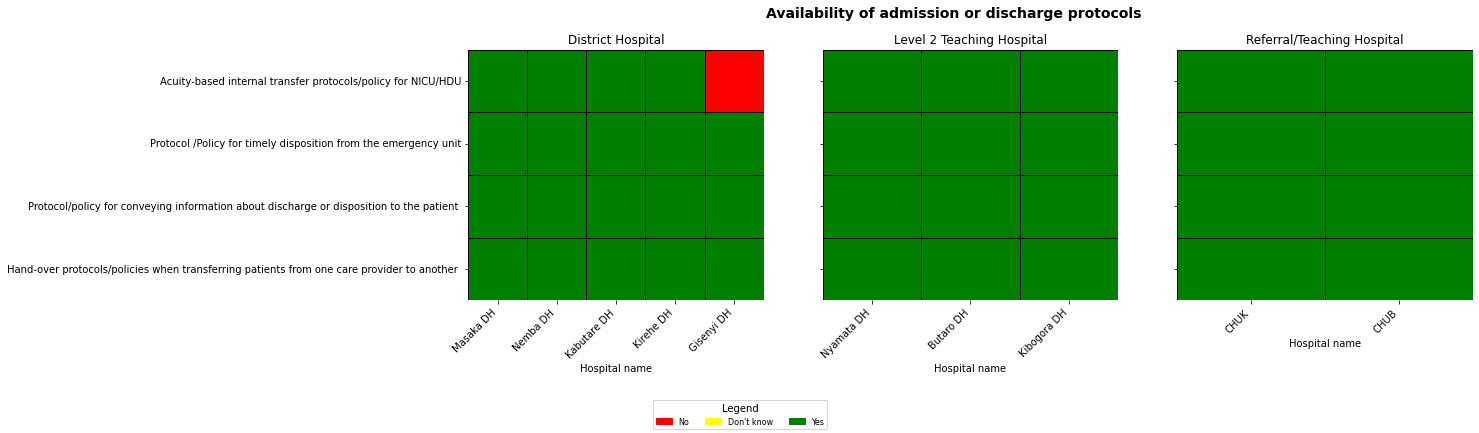

In [335]:
plot_service_availability_heatmap(data, services, "Availability of admission or discharge protocols")

In [336]:
# # Create figure for subplots
# fig, axes = plt.subplots(1, len(hospital_levels), figsize=(6 * len(hospital_levels), 6), sharey=True)

# # Generate heatmaps for each hospital level
# for i, level in enumerate(hospital_levels):
#     # Filter data for the current hospital level
#     level_data = point_data[point_data['Hospital level'] == level]
#     heatmap_data = level_data.set_index("Hospital name")[services].T.fillna(0)
#     binary_data = (heatmap_data > 0).astype(int)

#     # Explicitly ensure Referral/Teaching Hospitals appear fully green
#     if level == "Referral/Teaching Hospital":
#         binary_data[:] = 1

#     # Plot heatmap without numbers inside
#     sns.heatmap(binary_data, cbar=False, ax=axes[i], linewidths=0.5, linecolor="black",
#                 xticklabels=heatmap_data.columns, yticklabels=heatmap_data.index,
#                 cmap=["orangered", "forestgreen"], vmin=0, vmax=1, annot=False)

#     # Title and labels
#     axes[i].set_title(f"{level}")

#     # Rotate x-axis labels for readability
#     axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha="right")

# # Create a custom legend
# red_patch = mpatches.Patch(color='orangered', label='Unavailable')
# green_patch = mpatches.Patch(color='forestgreen', label='Available')

# # Add legend below the plots
# plt.figlegend(handles=[green_patch, red_patch], loc="lower center", ncol=2, title="Legend", fontsize=8)
# plt.subplots_adjust(bottom=0.3, top=0.9, wspace=0.1)

In [338]:
# data[['Acuity-based internal transfer protocols/policy for NICU/HDU',
#        'Protocol /Policy for timely disposition from the emergency unit',
#        'Protocol/policy for conveying information about discharge or disposition to the patient ',
#        'Hand-over protocols/policies when transferring patients from one care provider to aNother ',]]

In [ ]:
data.columns

Index(['Hospital name', 'Hospital level',
       'Are there regulations and/or protocols mandating that critically ill or injured patients are clinically triaged prior to being required to register?',
       'Does the facility require payment prior to provision of initial emergency care?',
       'Are vital signs measured in dedicated triage area? ',
       'Does this facility have a formal triage system available',
       'Is this formal triage system in actual use?',
       'Have all personnel that use the formal triage system been trained to use it?',
       'Are there time targets for each triage category (e.g., YELLOW – seen by provider within 2 hours)? ',
       'If there are time targets, is compliance tracked regularly?',
       'Are there specific triage protocols for children <2 years of age?',
       'Protocol for systematic triage that ensures patients are seen in order of severity of their conditions',
       'Clear protocol for communication with hospital administration d

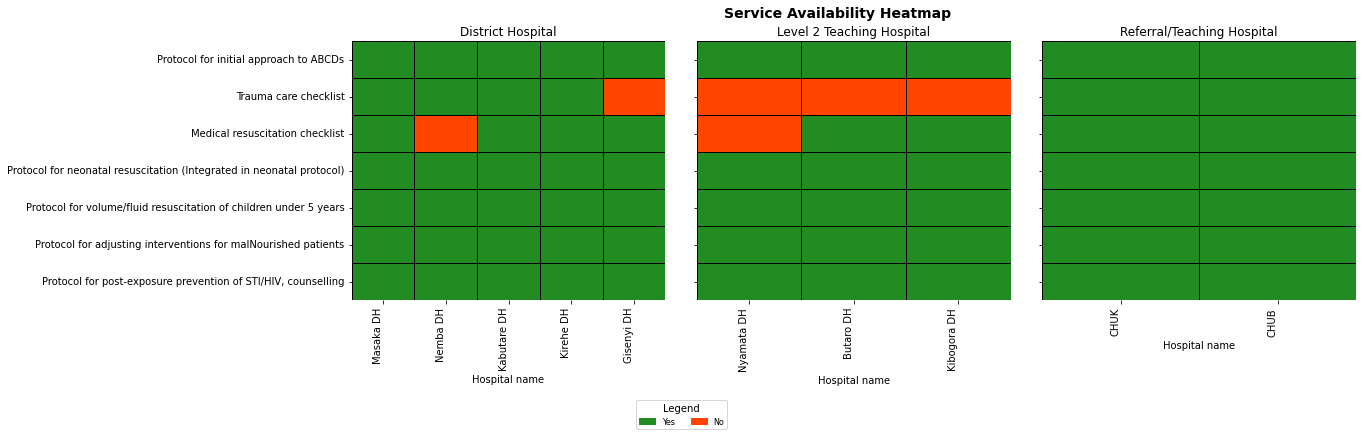

NameError: name 'infra_data' is not defined